# Lenet-5

11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________

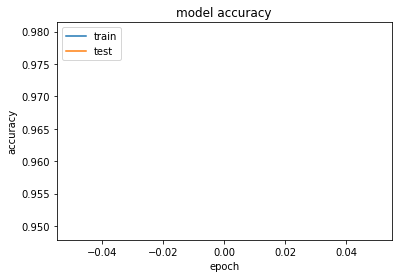

1875/1875 [==============================] - 10s 5ms/step - loss: 0.1707 - accuracy: 0.9494 - val_loss: 0.0625 - val_accuracy: 0.9799
Epoch 2/2
1865/1875 [============================>.] - ETA: 0s - loss: 0.0652 - accuracy: 0.9799
Epoch 00002: val_accuracy improved from 0.97990 to 0.98320, saving model to best_model
INFO:tensorflow:Assets written to: best_model/assets
['loss', 'accuracy', 'val_loss', 'val_accuracy']
0.9832000136375427


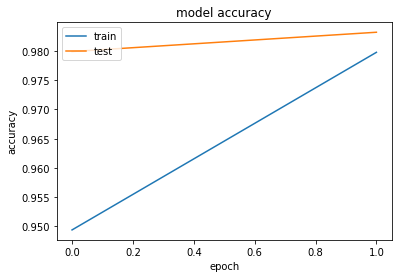

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0655 - accuracy: 0.9798 - val_loss: 0.0564 - val_accuracy: 0.9832


In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


#load the MNIST dataset from keras datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Process data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) # Expend dimension for 1 cahnnel image
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)  # Expend dimension for 1 cahnnel image
X_train = X_train / 255 # Normalize
X_test = X_test / 255 # Normalize

#One hot encoding
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

#Build LetNet model with Keras
def LetNet(width, height, depth, classes):
    # initialize the model
    model = Sequential()

    # first layer, convolution and pooling
    model.add(Conv2D(input_shape=(width, height, depth), kernel_size=(5, 5), filters=6, strides=(1,1), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # second layer, convolution and pooling
    model.add(Conv2D(input_shape=(width, height, depth), kernel_size=(5, 5), filters=16, strides=(1,1), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Fully connection layer
    model.add(Flatten())
    model.add(Dense(120,activation = 'tanh'))
    model.add(Dense(84,activation = 'tanh'))

    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))

    return model

# create model
LetNet_model = LetNet(28,28,1,10)
LetNet_model.summary()
LetNet_model.compile(optimizer=Adam(lr=0.001),loss = 'categorical_crossentropy',metrics=['accuracy'])

# create check point
filepath = "best_model"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# early stopping
early = EarlyStopping(monitor='val_accuracy', patience=3)

# custom callback
class CustomCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.accuracy = []
        self.val_accuracy = []
        pass

    def on_train_end(self, logs={}):
        pass

    def on_epoch_begin(self, epoch, logs={}):
        pass

    def on_epoch_end(self, epoch, logs={}):
        keys = list(logs.keys())
        print(keys)
        print(logs.get('val_accuracy'))
        self.accuracy.append(logs.get('accuracy'))
        self.val_accuracy.append(logs.get('val_accuracy'))
       
        plt.plot(self.accuracy)
        plt.plot(self.val_accuracy)
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

custom_callback = CustomCallback()

#Strat training
#History = LetNet_model.fit(X_train, y_train, epochs=20, batch_size=32,validation_data=(X_test, y_test),callbacks = [checkpoint,early])
History = LetNet_model.fit(X_train, y_train, epochs=2, batch_size=32,validation_data=(X_test, y_test),callbacks = [checkpoint,early,custom_callback])

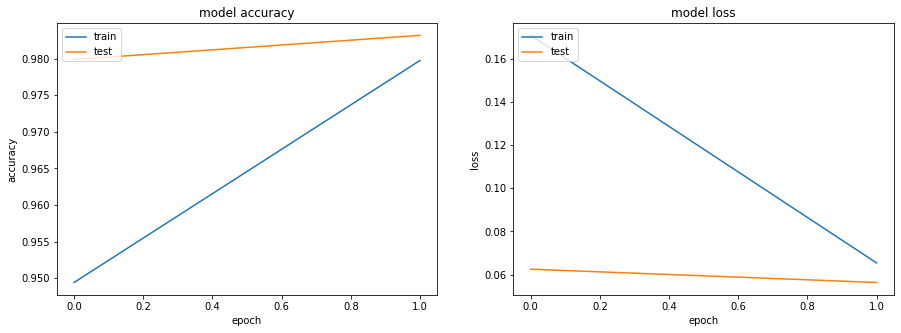

In [2]:
#Plot Loss and accuracy
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')